In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse 

In [2]:
experience=[1.2,1.5,1.9,2.2,4.2,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary    =[1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]
data=pd.DataFrame({
    "experience":experience,
    'salary':salary
})
data


,experience,salary
0,1.2,1.7
1,1.5,2.4
2,1.9,2.3
3,2.2,3.1
4,4.2,3.7
5,2.5,4.2
6,2.8,4.4
7,3.1,6.1
8,3.3,5.4
9,3.7,5.7


Text(0, 0.5, 'sal')

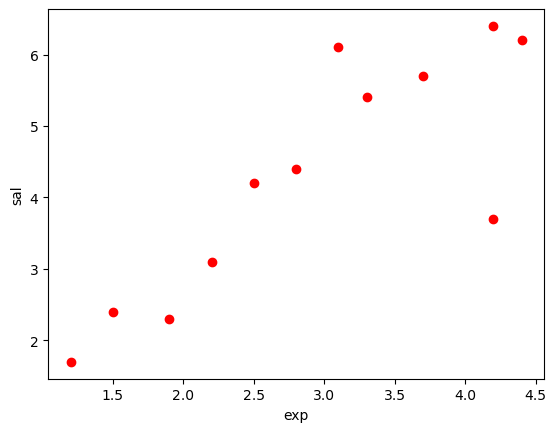

In [3]:
plt.scatter(data.experience,data.salary,color='red',label='data points')
plt.xlabel("exp")
plt.ylabel("sal")

Text(0.5, 1.0, 'Beta value0.8with MSE 3.1722')

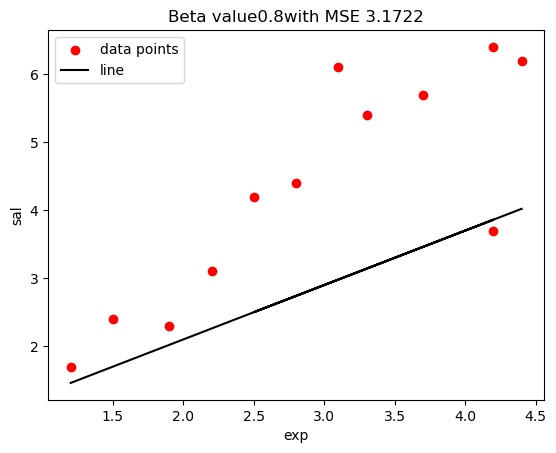

In [4]:
beta=0.8

b=0.5

line1=[]

for i in range(len(data)):
    line1.append(data.experience[i]*beta+b)
plt.scatter(data.experience,data.salary,color='red',label='data points')
plt.xlabel("exp")
plt.ylabel("sal")   
plt.plot(data.experience,line1,color='k',label='line')
plt.legend()
MSE=mse(data.salary,line1)
plt.title('Beta value'+str(beta)+'with MSE '+str(MSE))


In [5]:
def Error(Beta,data):
    b=1.1
    salary=[]
    experinence=data.experience
    
    for i in range(len(data.experience)):
        tmp=data.experience[i]*Beta+b
        salary.append(tmp)
    MSE =mse(data.salary,salary)
    return MSE

In [6]:
slope =[i/100 for  i in range(0,150)]

cost=[]
for i in slope:
    cost1=Error(Beta=i,data=data)
    cost.append(cost1)

In [7]:
cost_table=pd.DataFrame({
    'Beta':slope,
    'Cost':cost
})
cost_table

,Beta,Cost
0,0.00,12.791667
1,0.01,12.578176
2,0.02,12.366602
3,0.03,12.156946
4,0.04,11.949208
...,...,...
145,1.45,1.855887
146,1.46,1.920458
147,1.47,1.986946
148,1.48,2.055352


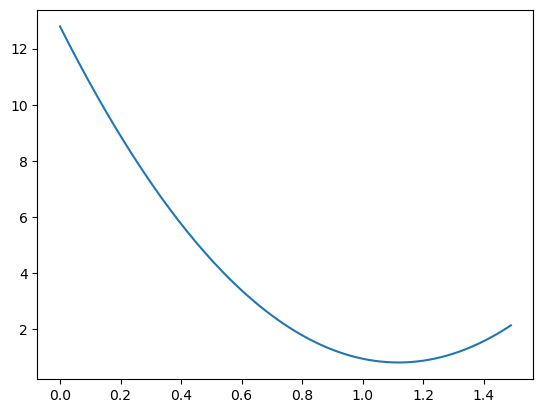

In [8]:
plt.plot(cost_table.Beta,cost_table.Cost)

# linear regression


In [9]:
data=pd.read_csv('train_cleaned.csv')

In [10]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data.Item_Outlet_Sales
x.shape,y.shape

((8523, 45), (8523,))

In [11]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=56)

In [16]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
lr=LR()
lr.fit(train_x,train_y)
test_predict=lr.predict(test_x)
MAE=mae(test_predict,test_y)
MAE

875.2688982985253

In [17]:
train_predict=lr.predict(train_x)
MAE=mae(train_predict,train_y)
MAE

821.4206146753689

In [19]:
#parametes of linear regression
lr.coef_


array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

Text(0.5, 1.0, 'coefficient plot')

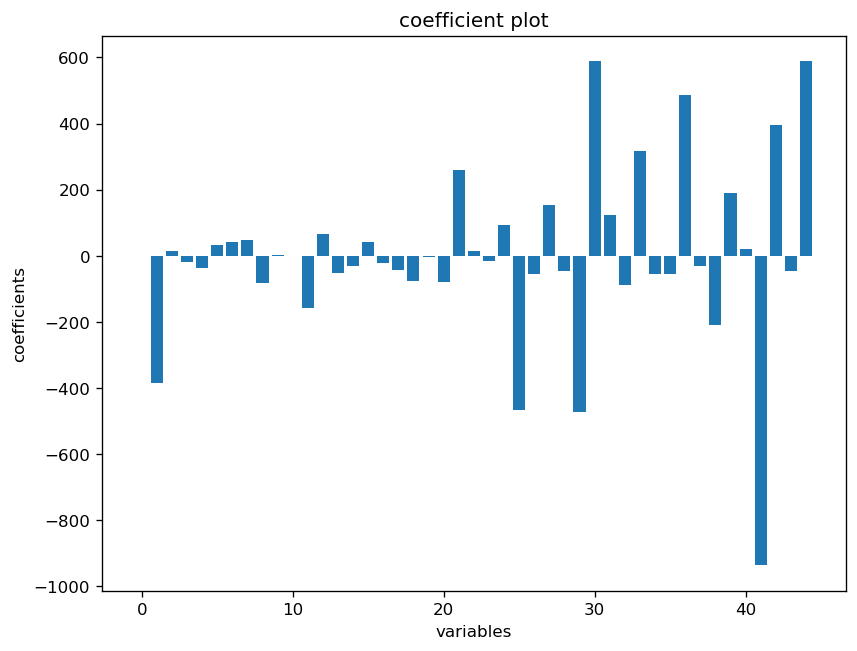

In [20]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel('coefficients')
plt.title('coefficient plot')


In [21]:
train_x.columns


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High

In [24]:
residuals=pd.DataFrame({
    'fitted values':test_y,
    'predicted values':test_predict
})
residuals['residuals']=residuals['fitted values']-residuals['predicted values']

In [25]:
residuals

,fitted values,predicted values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313
...,...,...,...
3327,2013.3792,1761.717256,251.661944
6445,1182.4608,1574.742084,-392.281284
586,665.8000,1340.917091,-675.117091
1999,193.0820,1627.882453,-1434.800453


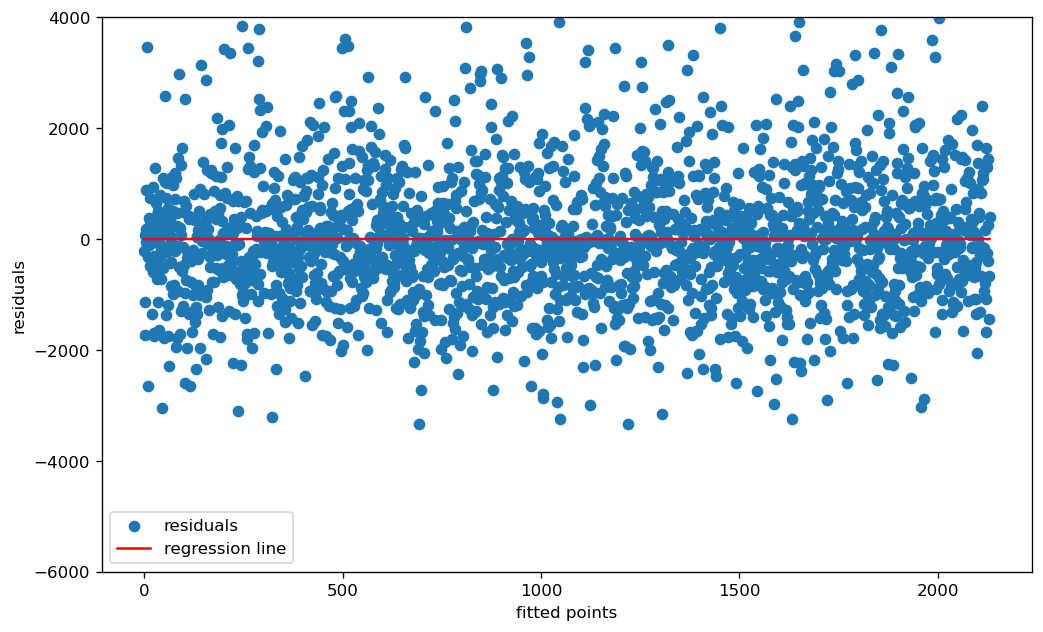

In [28]:
plt.figure(figsize=(10,6),dpi=120,facecolor='w',edgecolor='b')
f=range(0,2131)
k=[0 for i in range(0,2131)]
plt.scatter(f,residuals.residuals[:],label='residuals')
plt.plot(f,k,color='red',label='regression line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.ylim(-6000,4000)
plt.legend()

Text(0.5, 1.0, 'distribution of errror terms')

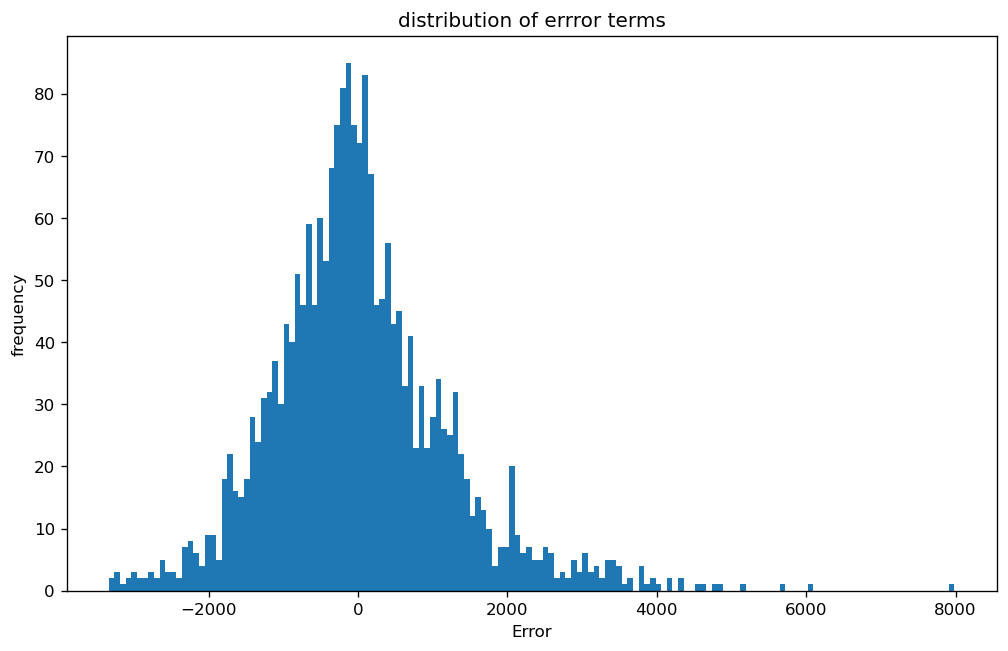

In [31]:
#checking the distribution of residuals
plt.figure(figsize=(10,6),dpi=120)
plt.hist(residuals.residuals,bins=150)
plt.xlabel('Error')
plt.ylabel("frequency")
plt.title('distribution of errror terms')

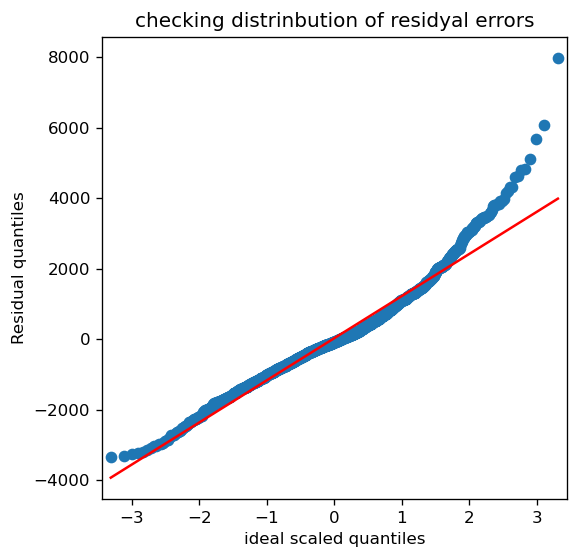

In [34]:
#QQ plot (is the ddata normally distribured)
from statsmodels.graphics.gofplots import qqplot

fig,ax =plt.subplots(figsize=(5,5),dpi=120)
qqplot(residuals.residuals,line='s',ax=ax)
plt.ylabel('Residual quantiles')
plt.xlabel('ideal scaled quantiles')
plt.title('checking distrinbution of residyal errors')
plt.show()


In [38]:
#vif variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
vif

Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

In [40]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
lr=LR(normalize=True)
lr.fit(train_x,train_y)
test_predict=lr.predict(test_x)
MAE=mae(test_predict,test_y)
MAE

C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


899.8644529328953

In [41]:
 train_predict=lr.predict(train_x)
MAE=mae(train_predict,train_y)
MAE

846.0141861076346

Text(0.5, 1.0, 'coefficient plot')

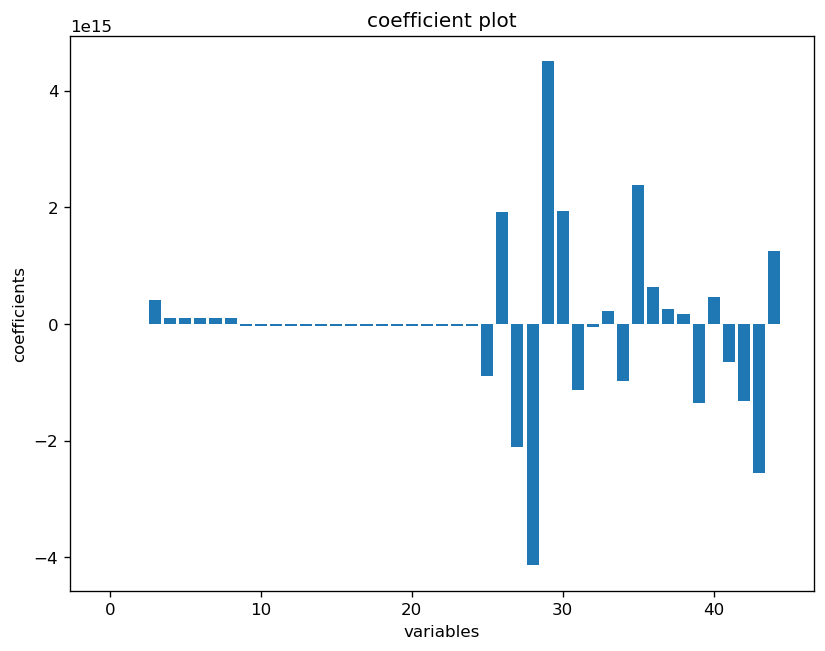

In [42]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel('coefficients')
plt.title('coefficient plot')


In [78]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data.Item_Outlet_Sales
x.shape,y.shape
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
lr=LR(normalize=True)
lr.fit(train_x,train_y)
test_predict=lr.predict(test_x)
MAE=mae(test_predict,test_y)
MAE

C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


1156.3262584702018

In [79]:

coefficients =pd.DataFrame({
    'variable':x.columns,
    'coeffiecient':lr.coef_
})
coefficients.head()

ValueError: All arrays must be of the same length

In [73]:
sig_var=coefficients[coefficients.coeffiecient>0.5]

In [74]:
subset=data[sig_var['variable'].values]
subset

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT013,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT046,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type3
0,249.8092,1999,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,48.2692,2009,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,141.6180,1999,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,182.0950,1998,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,53.8614,1987,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,214.5218,1987,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
8519,108.1570,2002,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8520,85.1224,2004,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8521,103.1332,2009,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [75]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(subset,y,random_state=56)

ValueError: Found input variables with inconsistent numbers of samples: [8523, 28]

In [76]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
lr=LR(normalize=True)
lr.fit(train_x,train_y)
test_predict=lr.predict(test_x)
MAE=mae(test_predict,test_y)
MAE

C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


1156.3262584702018

Text(0.5, 1.0, 'coefficient plot')

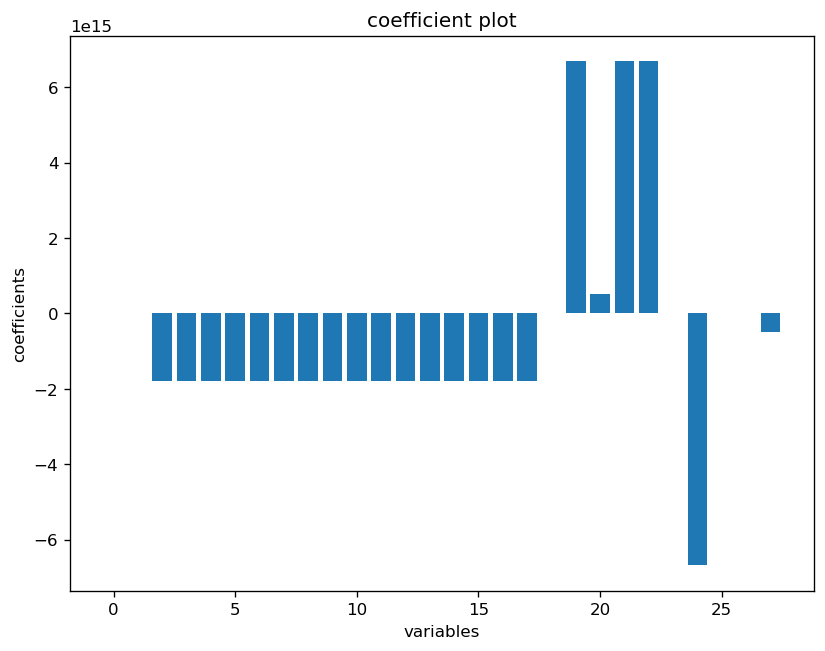

In [77]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel('coefficients')
plt.title('coefficient plot')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('data_cleaned.csv')

In [3]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [4]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x,train_y, test_y=tts(x,y,random_state=56)

In [5]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler=mms()

In [6]:
cols=train_x.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [7]:
train_x_scaled=scaler.fit_transform(train_x)
train_x_scaled=pd.DataFrame(train_x_scaled,columns=cols)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
test_x_scaled=scaler.transform(test_x)
test_x_scaled=pd.DataFrame(test_x_scaled,columns=cols)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.396833,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.359135,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.371701,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
from sklearn.linear_model import LogisticRegression as Logreg


In [10]:
logreg=Logreg()
logreg.fit(train_x,train_y)

C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
train_predict=logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [12]:
from sklearn.metrics import f1_score

In [13]:
k=f1_score(train_predict,train_y)
k

0.7514910536779325

In [14]:
test_predict=logreg.predict(test_x)
k=f1_score(test_predict,test_y)
k

0.736842105263158

In [15]:
train_predict=logreg.predict_proba(train_x)
train_predict

array([[0.51867135, 0.48132865],
       [0.90645407, 0.09354593],
       [0.87277559, 0.12722441],
       ...,
       [0.22650937, 0.77349063],
       [0.31394421, 0.68605579],
       [0.04407909, 0.95592091]])

In [16]:
train_preds=train_predict[:,1]
train_preds

array([0.48132865, 0.09354593, 0.12722441, 0.77756914, 0.63020175,
       0.11669139, 0.84459044, 0.77366647, 0.53501601, 0.08338185,
       0.10613431, 0.08553603, 0.12421022, 0.09641767, 0.6083723 ,
       0.08455818, 0.30753585, 0.12035017, 0.0717328 , 0.28563099,
       0.10252359, 0.21838473, 0.07136647, 0.58971308, 0.09038886,
       0.51366301, 0.08539124, 0.55639165, 0.60347071, 0.12842065,
       0.82067678, 0.08557063, 0.58491041, 0.13659625, 0.0223488 ,
       0.57572799, 0.2180982 , 0.12568624, 0.05874396, 0.28481698,
       0.84160156, 0.39122988, 0.20306745, 0.70599696, 0.48040279,
       0.94315087, 0.36970077, 0.22130004, 0.16749309, 0.8925908 ,
       0.13264213, 0.63843981, 0.2384999 , 0.61036268, 0.34074316,
       0.64578663, 0.77860742, 0.29212568, 0.10934473, 0.29889873,
       0.58397408, 0.29212568, 0.12451358, 0.457215  , 0.1028843 ,
       0.97621536, 0.11709729, 0.08553603, 0.86433472, 0.66361742,
       0.93056617, 0.74853347, 0.89845187, 0.44875729, 0.84172

In [17]:
for i in range(0,len(train_preds)):
    if train_preds[i]>0.66:
        train_preds[i]=1
    else:
        train_preds[i]=0

In [18]:
k=f1_score(train_preds,train_y)
k


0.6761904761904762

In [19]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(test_y,test_predict)
cf

array([[127,  17],
       [ 23,  56]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report as rep
rep(test_y,test_predict)

'              precision    recall  f1-score   support\n\n           0       0.85      0.88      0.86       144\n           1       0.77      0.71      0.74        79\n\n    accuracy                           0.82       223\n   macro avg       0.81      0.80      0.80       223\nweighted avg       0.82      0.82      0.82       223\n'

In [21]:
logreg.coef_

array([[-0.03560921,  0.00286836,  1.01751339,  0.14976997, -1.08135705,
         1.18909299, -1.10316667,  0.85007141,  1.06475161,  0.35389295,
        -0.67871478, -0.78991249, -0.28658013, -0.42758226,  0.12318058,
         0.59996054, -0.1849921 ,  0.21258344, -0.35441657, -0.14196683,
        -0.16842274,  0.14107485,  0.2354384 , -0.29058693]])

Text(0.5, 1.0, 'coefficient plot')

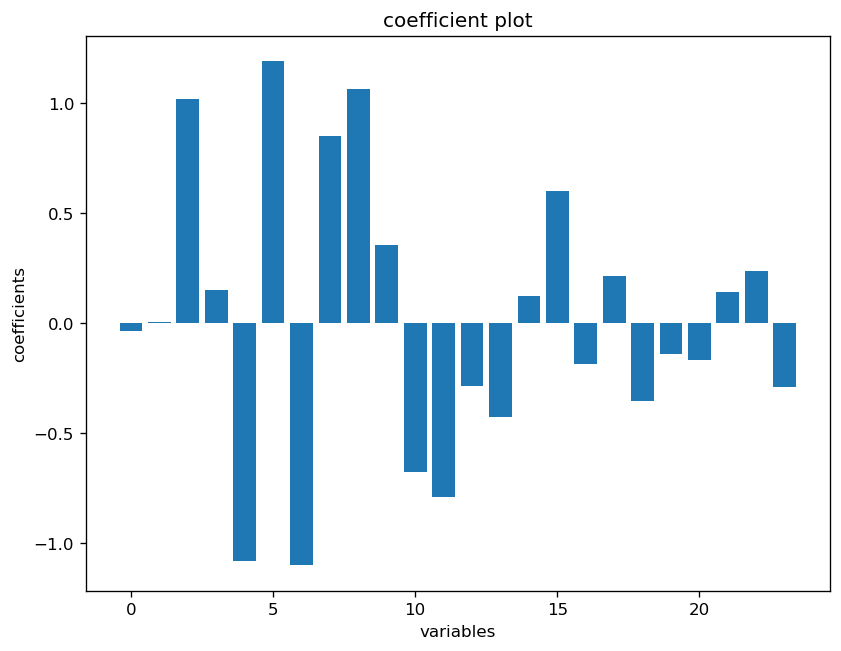

In [22]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x=range(len(train_x.columns))
c=logreg.coef_.reshape(-1)
plt.bar(x,c)
plt.xlabel("variables")
plt.ylabel('coefficients')
plt.title('coefficient plot')


In [23]:
coefficents=pd.DataFrame({
    'variable':train_x.columns,
    'coefficent':abs(c)
})

In [24]:
coefficents

,variable,coefficent
0,Age,0.035609
1,Fare,0.002868
2,Pclass_1,1.017513
3,Pclass_2,0.149770
4,Pclass_3,1.081357
5,Sex_female,1.189093
6,Sex_male,1.103167
7,SibSp_0,0.850071
8,SibSp_1,1.064752
9,SibSp_2,0.353893


In [25]:
sig_var=coefficents[coefficents.coefficent>0.3]

In [26]:
sig_var

,variable,coefficent
2,Pclass_1,1.017513
4,Pclass_3,1.081357
5,Sex_female,1.189093
6,Sex_male,1.103167
7,SibSp_0,0.850071
8,SibSp_1,1.064752
9,SibSp_2,0.353893
10,SibSp_3,0.678715
11,SibSp_4,0.789912
13,SibSp_8,0.427582


In [27]:
subset=data[sig_var['variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_4
0,0,1,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0


In [28]:
train_x,test_x,train_y,test_y=tts(subset,y,random_state=56)

In [29]:
 train_predict =logreg.predict(train_x)
k=f1_score(train_predict,train_y)


C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Age
- Embarked_C
- Embarked_Q
- Embarked_S
- Fare
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 12 features, but LogisticRegression is expecting 24 features as input.

In [9]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
x=np.array([i*np.pi/180 for i in range(10,360,3)])

In [11]:
np.random.seed(10)

In [12]:
y=np.sin(x)+np.random.normal(0,0.15,len(x))

In [13]:
data=pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [14]:
data.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


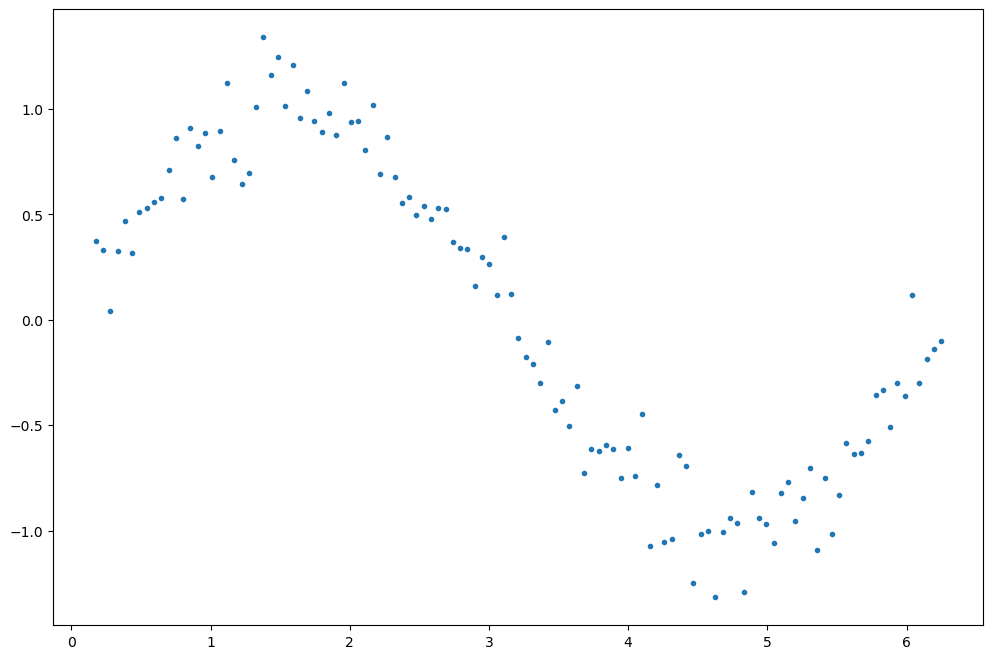

In [15]:
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.')

In [45]:
for i in range(2,12):
    colname='x_%d'%i
    data[colname]=data['x']**i
data.head()


,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05


In [16]:
data['randNumCol']=np.random.randint(1,6,data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train=train.drop('randNumCol',axis=1)
test=test.drop('randNumCol',axis=1)

In [17]:
#linear regression

In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
x_train=train.drop('y',axis=1).values
y_train=train['y'].values
x_test=test.drop('y',axis=1).values
y_test=test['y'].values

Training error 0.3536257863515215
Testing error 0.18974033118165393


C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


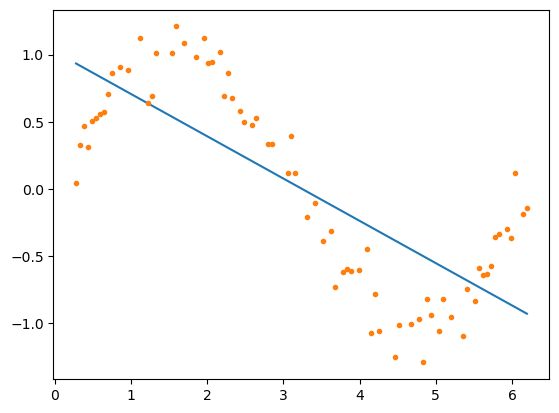

In [50]:
#linear regression with one feature

independent_variable_train=x_train[:,:1]

linreg=LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred=linreg.predict(independent_variable_train)

rss_train=sum((y_train_pred-y_train)**2)/x_test.shape[0]


independent_variable_test=x_test[:,0:1]

 

y_test_pred=linreg.predict(independent_variable_test)
rss_test=sum((y_test_pred-y_test)**2)/x_test.shape[0]

print('Training error',rss_train)
print('Testing error',rss_test)

plt.plot(x_train[:,0:1],y_train_pred)
plt.plot(x_train[:,0:1],y_train,'.')

Training error 0.03562479930182951
Testing error 0.030451878881969454


C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


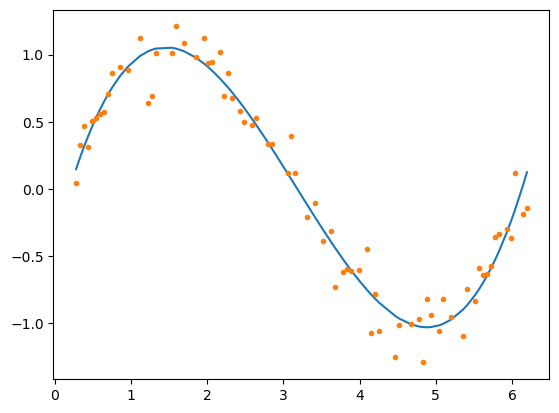

In [51]:
#linear regression with three feature

independent_variable_train=x_train[:,:3]

linreg=LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred=linreg.predict(independent_variable_train)

rss_train=sum((y_train_pred-y_train)**2)/x_test.shape[0]


independent_variable_test=x_test[:,0:3]

 

y_test_pred=linreg.predict(independent_variable_test)
rss_test=sum((y_test_pred-y_test)**2)/x_test.shape[0]

print('Training error',rss_train)
print('Testing error',rss_test)

plt.plot(x_train[:,0:1],y_train_pred)
plt.plot(x_train[:,0:1],y_train,'.')

In [87]:
def  linear_regression(train_x,train_y,test_x,test_y,features,models_to_plot):
    
    linreg=LinearRegression(normalize=True)
    linreg.fit(train_x,train_y)
    train_y_pred=linreg.predict(train_x)
    test_y_pred=linreg.predict(test_x)
    
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('number of predictions :%d'%features)
        
        rss_train=sum((train_y_pred-train_y)**2)/train_x.shape[0]
        ret=[rss_train]
        
        rss_test=sum((test_y_pred-test_y)**2)/test_x.shape[0]
        ret.extend([rss_test])
        
        ret.extend([linreg.intercept_])
        ret.extend([linreg.coef_])
        
        return ret

In [88]:
col=['mrss_train','mrss_test','intercept']+['coef_var_%d'%i for i in range(1,16)]
ind=['Number_of_variable_%d'%i  for i in range(1,16)]
coef_matrix_simple=pd.DataFrame(index=ind,columns=col)
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_var_1,coef_var_2,coef_var_3,coef_var_4,coef_var_5,coef_var_6,coef_var_7,coef_var_8,coef_var_9,coef_var_10,coef_var_11,coef_var_12,coef_var_13,coef_var_14,coef_var_15
Number_of_variable_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
models_to_plot={1:231,3:232,6:233,9:234,12:235,15:236}


C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Vinnusss\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the 

ValueError: could not broadcast input array from shape (4,) into shape (6,)

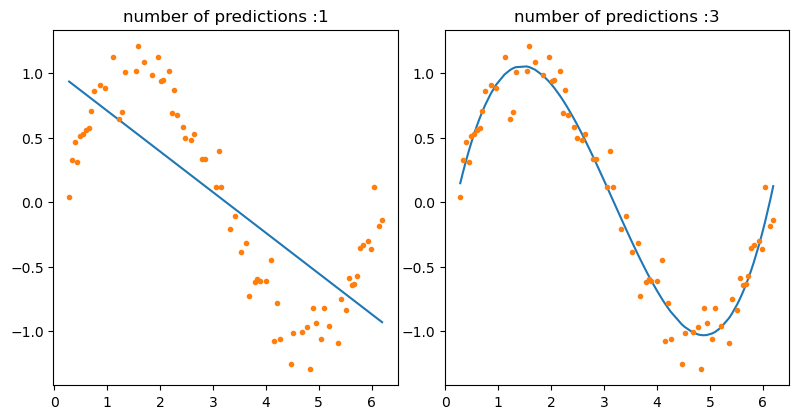

In [92]:
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x=x_train[:,0:i]
    train_y=y_train
    test_x=x_test[:,0:i]
    test_y=y_test
    
    coef_matrix_simple.iloc[i-1,0:i+3]=linear_regression(train_x,train_y,test_x,test_y,i,models_to_plot)
    

In [94]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
        
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)
    
    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        
        plt.plot(train_x[:,0:1],train_y,'.')
        
        plt.title('Number of Predictors: %d'%features)
    
    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])
    
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

In [95]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [96]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

m

ValueError: could not broadcast input array from shape (14,) into shape (15,)

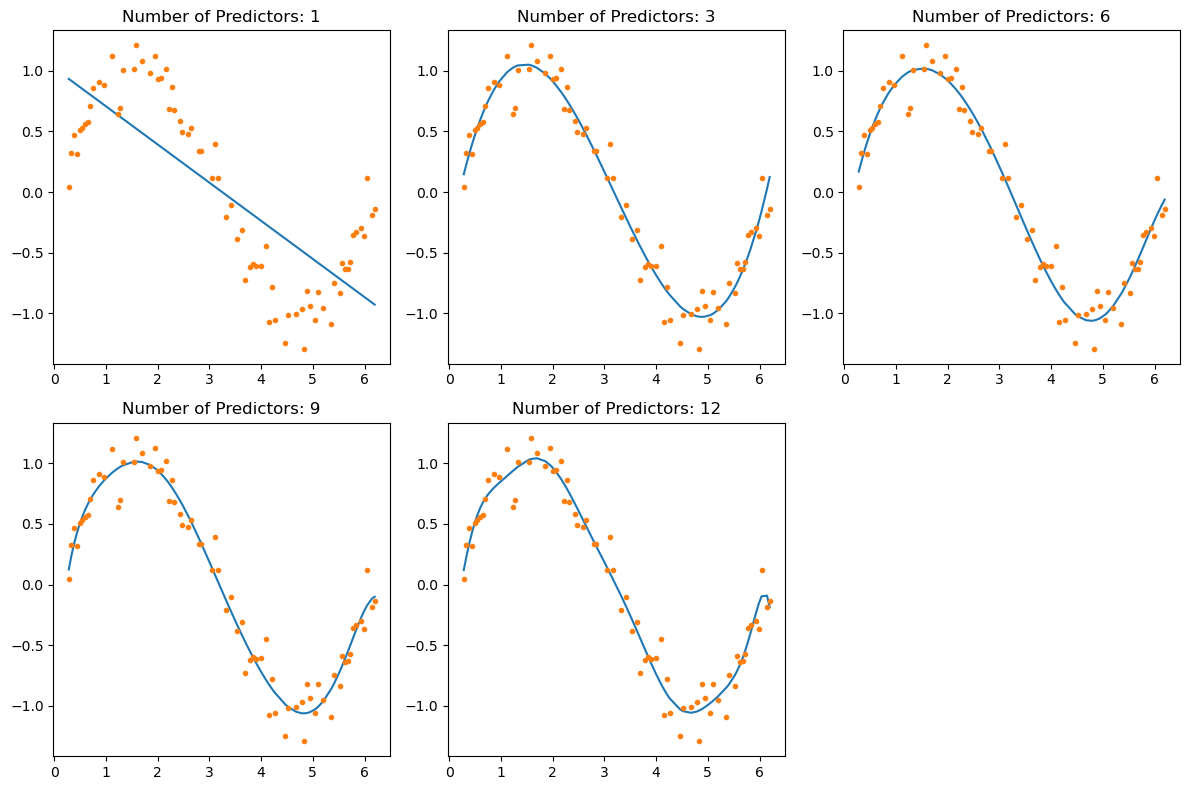

In [98]:
#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = x_train[:,0:i]
    train_y = y_train
    test_x = x_test[:,0:i]
    test_y = y_test
    
    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

In [99]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,1,-0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,1.1,-0.39,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.4,2.2,-0.99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.43,2.3,-1,0.12,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.096,1.2,0.0084,-0.29,0.069,-0.0043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.4,2.5,-1.6,0.66,-0.2,0.031,-0.0018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.38,2.4,-1.5,0.53,-0.15,0.021,-0.00067,-5.1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.85,5.1,-7,6,-3.1,0.92,-0.16,0.015,-0.00058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.94,5.7,-8.5,7.7,-4.3,1.4,-0.28,0.033,-0.002,5e-05,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-2.4,16,-38,50,-39,19,-6,1.2,-0.15,0.011,-0.00033,NaN,NaN,NaN,NaN,NaN


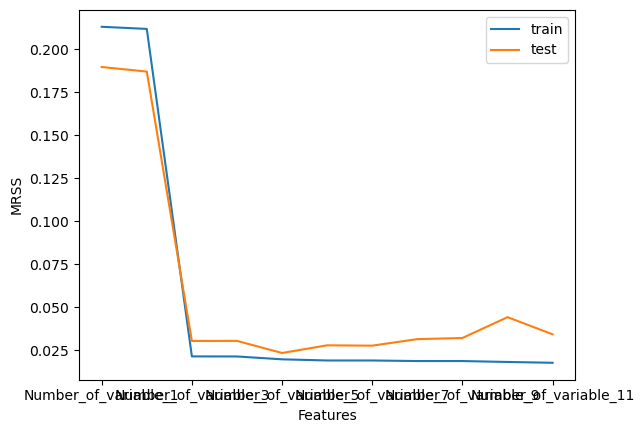

In [100]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.linear_model import Ridge


In [28]:
alpha_ridge=[0,1e-8,1e-4,1e-3,1e-2,1,5,10,20,25]
y_train

array([ 0.04382731,  0.32431058,  0.46780699,  0.31460543,  0.5092983 ,
        0.53132035,  0.55983662,  0.57562499,  0.70774154,  0.86245397,
        0.90895069,  0.88592269,  1.1214746 ,  0.64303338,  0.69479891,
        1.01020625,  1.01426321,  1.20954715,  1.08452678,  0.98116794,
        1.12345482,  0.93555978,  0.94297909,  1.01750841,  0.68884008,
        0.86507918,  0.67872292,  0.58265845,  0.4949728 ,  0.47904823,
        0.53163511,  0.33813434,  0.33573584,  0.11769286,  0.39410505,
        0.12016643, -0.20847552, -0.10631958, -0.38677492, -0.31254413,
       -0.72782148, -0.62010088, -0.59488415, -0.61286292, -0.60634871,
       -0.44900439, -1.07429632, -0.78152961, -1.05556393, -1.24872355,
       -1.01504324, -1.0067154 , -0.96497428, -1.29170522, -0.81865152,
       -0.93768847, -1.05860252, -0.82039   , -0.95526156, -1.09181233,
       -0.74842309, -0.83309476, -0.58559631, -0.63731649, -0.63359719,
       -0.57431684, -0.35757833, -0.33234658, -0.29807903, -0.36

In [33]:
def ridge_regression(train_x,train_y,test_x,test_y,alpha,models_to_plot={}):
    ridgereg=Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred=ridgereg.predict(train_x)
    test_y_pred=ridgereg.predict(test_x)
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,".")
        plt.title('plot for alpha:%3g'%alpha)
        
    mrss_train=sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret=[mrss_train]
    
    mress_test=sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_train])
    
    ret.extend([ridgereg.intercept_])
    ret.extend([ridgereg.coef_])
    
    return ret



In [34]:
col=['mrss_train','mrss_test','intercept']+['coef_var_%d'%i for i in range(1,16)]
ind=['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge=pd.DataFrame(index=ind,columns=col)


In [35]:
models_to_plot={0:231,1e-4:232,1e-3:233,1e-2:234,1:235,5:236}


C:\Users\Vinnusss\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Vinnusss\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

ValueError: could not broadcast input array from shape (4,) into shape (18,)

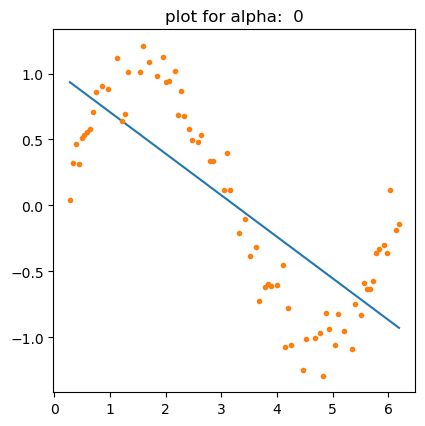

In [36]:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_ridge.iloc[i,]=ridge_regression(x_train,y_train,x_test,y_test,alpha_ridge[i],models_to_plot)
    